<a href="https://colab.research.google.com/github/angelikipilioura/Computational-Data-Journalism/blob/main/Homework_for_lesson9_Angeliki_Pilioura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Μέρος 1**

In [1]:
# για το scraping
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
from sklearn.feature_extraction.text import CountVectorizer

# για τα nan values
import numpy as np

# για τα γραφήματα
import matplotlib.pyplot as plt

# για την επεξεργασία ελληνικών κειμένων
import spacy

In [2]:
!python -m spacy download el_core_news_sm
nlp = spacy.load('el_core_news_sm')

2023-06-13 21:21:39.992017: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 44.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [3]:
newsit_teasers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csvs/newsit_ekloges_2023_.csv')
newsit_teasers_df.head()

,url
0,https://www.newsit.gr/politikh/ekloges-2023-ka...
1,https://www.newsit.gr/politikh/giannis-oikonom...
2,https://www.newsit.gr/ellada/ekloges-2023-ti-i...
3,https://www.newsit.gr/politikh/ekloges-2023-pa...
4,https://www.newsit.gr/politikh/ekloges-2023-ni...


In [4]:
full_articles_list = []

for article_url in newsit_teasers_df['url']:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('div', {'class': 'grid-container grid-parent'})

  full_article_dict = {}

  # website
  full_article_dict['site'] = "newsit.gr"

  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = article.find_all('a')
    if len(section) > 1:
      full_article_dict['section'] = section[1].get_text(strip=True)
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = doc.find('h1', {'class': 'entry-title'}).text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = doc.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # author
  try:
    author = doc.find('span', {'class', "author-name"}).text
    author = author.strip()
    author = author.replace('\r', '').replace('\n', '').strip()
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = ''
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = doc.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [5]:
newsit_full_articles_df = pd.DataFrame(full_articles_list)
newsit_full_articles_df

,site,url,section,title,date,author,full_text
0,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-ka...,Πολιτικη,Εκλογές 2023: Καβγάς Σοφίας Βούλτεψη και Χρήστ...,2023-06-04T13:41:49+03:00,Κωνσταντινος Μακρης,NewsIT Πολιτικη Καβγας Βουλτεψη με Σπιρτζη - «...
1,newsit.gr,https://www.newsit.gr/politikh/giannis-oikonom...,Πολιτικη,Γιάννης Οικονόμου για εκλογές: Ευθεία ανάμειξη...,2023-06-04T11:27:55+03:00,Καρολινα Μισελ,NewsIT Πολιτικη Γιαννης Οικονομου: Ευθεια αναμ...
2,newsit.gr,https://www.newsit.gr/ellada/ekloges-2023-ti-i...,Ελλαδα,Εκλογές 2023: Τι ισχύει με τους ετεροδημότες κ...,2023-06-04T09:54:00+03:00,Μαιρη Καλουτσακη,NewsIT Ελλαδα Εκλογες 2023: Τι ισχυει με τους ...
3,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-pa...,Πολιτικη,Εκλογές 2023 – ΠΑΣΟΚ: Η ευχή του γιου του Ούλω...,2023-06-04T09:13:57+03:00,Κωνσταντινος Μακρης,NewsIT Πολιτικη Η ευχη του γιου του Ουλωφ Παλμ...
4,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-ni...,Πολιτικη,Εκλογές 2023 – Νίκος Ανδρουλάκης: Αγωνιζόμαστε...,2023-06-03T13:24:14+03:00,Καρολινα Μισελ,NewsIT Πολιτικη Νικος Ανδρουλακης: Αγωνιζομαστ...
5,newsit.gr,https://www.newsit.gr/ellada/ekloges-2023-pou-...,Ελλαδα,"Εκλογές 2023: Που ψηφίζω, τι ισχύει με τους στ...",2023-06-03T12:32:03+03:00,Μαιρη Καλουτσακη,"NewsIT Ελλαδα Εκλογες 2023: Που ψηφιζω, τι ισχ..."
6,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-ky...,Πολιτικη,Εκλογές 2023 – Κυριάκος Μητσοτάκης: Υπήρξε ανο...,2023-06-03T12:12:44+03:00,Καρολινα Μισελ,NewsIT Πολιτικη Μητσοτακης: Υπηρξε ανοιχτη παρ...
7,newsit.gr,https://www.newsit.gr/politikh/ekloges-25-ioun...,Πολιτικη,Εκλογές 25 Ιουνίου 2023: Τα 44 κόμματα που δήλ...,2023-06-03T11:35:01+03:00,Καρολινα Μισελ,NewsIT Πολιτικη Τα 44 κομματα που δηλωσαν συμμ...
8,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-ni...,Πολιτικη,"Εκλογές 2023, Νίκος Ανδρουλάκης: «Η ΝΔ αγωνιά ...",2023-06-02T22:53:18+03:00,Καρολινα Μισελ,NewsIT Πολιτικη Ανδρουλακης: «Η ΝΔ αγωνια για ...
9,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-ak...,Πολιτικη,Εκλογές 2023 – Άκης Σκέρτσος σε ΣΥΡΙΖΑ: Τα πολ...,2023-06-02T22:03:07+03:00,Ανδρεας Μορφοπουλος,NewsIT Πολιτικη Σκερτσος σε Τσιπρα - «Τα πολλα...


In [6]:
newsit_full_articles_df.loc[0, 'date']
newsit_full_articles_df['datetime'] = pd.to_datetime(newsit_full_articles_df['date'], format='%Y-%m-%d %H:%M')
newsit_full_articles_df.head()

,site,url,section,title,date,author,full_text,datetime
0,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-ka...,Πολιτικη,Εκλογές 2023: Καβγάς Σοφίας Βούλτεψη και Χρήστ...,2023-06-04T13:41:49+03:00,Κωνσταντινος Μακρης,NewsIT Πολιτικη Καβγας Βουλτεψη με Σπιρτζη - «...,2023-06-04 13:41:49+03:00
1,newsit.gr,https://www.newsit.gr/politikh/giannis-oikonom...,Πολιτικη,Γιάννης Οικονόμου για εκλογές: Ευθεία ανάμειξη...,2023-06-04T11:27:55+03:00,Καρολινα Μισελ,NewsIT Πολιτικη Γιαννης Οικονομου: Ευθεια αναμ...,2023-06-04 11:27:55+03:00
2,newsit.gr,https://www.newsit.gr/ellada/ekloges-2023-ti-i...,Ελλαδα,Εκλογές 2023: Τι ισχύει με τους ετεροδημότες κ...,2023-06-04T09:54:00+03:00,Μαιρη Καλουτσακη,NewsIT Ελλαδα Εκλογες 2023: Τι ισχυει με τους ...,2023-06-04 09:54:00+03:00
3,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-pa...,Πολιτικη,Εκλογές 2023 – ΠΑΣΟΚ: Η ευχή του γιου του Ούλω...,2023-06-04T09:13:57+03:00,Κωνσταντινος Μακρης,NewsIT Πολιτικη Η ευχη του γιου του Ουλωφ Παλμ...,2023-06-04 09:13:57+03:00
4,newsit.gr,https://www.newsit.gr/politikh/ekloges-2023-ni...,Πολιτικη,Εκλογές 2023 – Νίκος Ανδρουλάκης: Αγωνιζόμαστε...,2023-06-03T13:24:14+03:00,Καρολινα Μισελ,NewsIT Πολιτικη Νικος Ανδρουλακης: Αγωνιζομαστ...,2023-06-03 13:24:14+03:00


In [7]:
cv = CountVectorizer()

In [8]:
count_vector = cv.fit_transform(newsit_full_articles_df['full_text'])

In [9]:
count_vector.shape

(20, 2264)

In [10]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,02,06,10,11,12,13,132,14,145,...,όταν,ότι,όφειλαν,όχι,όψει,ύψος,ύψους,ώρα,ώρες,ώστε
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,6,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,1,0,0,0,0,0


In [11]:

cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [12]:
count_vector = cv.fit_transform(newsit_full_articles_df['full_text'])

In [13]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,02,06,10,11,12,13,132,14,145,...,όνομα,όντως,όριο,όρο,όφειλαν,όψει,ύψος,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)

In [15]:
count_vector = cv.fit_transform(newsit_full_articles_df['full_text'])

In [16]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,02,06,10,11,12,13,132,14,145,...,όνομα,όντως,όριο,όρο,όφειλαν,όψει,ύψος,ύψους,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(newsit_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,2023,21ης,25ης,newsit,δημοκρατίας,διαβάστε,εθνικές,ειδήσεις,ειδησεις,εκατ,εκλογές,εκλογες,ευρώ,ιουνίου,μαΐου,νέας,νδ,πασοκ,πρόγραμμα,συριζα
0,3,1,1,1,1,1,1,1,1,0,4,1,0,1,0,1,3,0,6,5
1,3,1,1,1,1,1,1,1,1,0,3,1,0,1,0,1,2,0,1,2
2,6,1,3,1,0,1,1,1,1,0,7,2,0,4,4,0,0,0,0,0
3,3,1,2,1,0,1,1,1,1,0,5,2,0,2,0,0,0,5,0,0
4,4,1,1,1,0,1,1,1,1,0,3,1,0,2,0,0,0,7,0,1


In [18]:


cv = CountVectorizer(stop_words=random.sample(list(nlp.Defaults.stop_words), 10), max_features=20, token_pattern=r'\bκυβ[α-ωά-ώ]*\b')
count_vector = cv.fit_transform(newsit_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()


,κυβέρνηση,κυβέρνησης,κυβερνήσει,κυβερνητική
0,0,0,0,1
1,1,0,1,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [19]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(newsit_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,2023 διαβάστε,2023 εκλογές,21ης μαΐου,21ης μαϊου,25ης ιουνίου,newsit πολιτικη,διαβάστε ειδήσεις,εθνικές εκλογές,εθνικες εκλογες,ειδήσεις εθνικές,ειδησεις εθνικες,εκατ ευρώ,εκλογές 2023,εκλογές 21ης,εκλογές 25ης,εκλογες 2023,μαϊου 2023,νέας δημοκρατίας,ολες ειδησεις,υπουργείου εσωτερικών
0,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,0
1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
2,1,1,0,1,3,0,1,1,1,1,1,0,1,1,3,2,1,0,1,3
3,1,1,0,1,2,1,1,1,1,1,1,0,1,1,2,1,1,0,1,0
4,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,0


In [20]:
results.sum(axis =0).sort_values(ascending = False)

εκλογές 21ης             27
25ης ιουνίου             26
νέας δημοκρατίας         23
εκλογες 2023             23
εκλογές 25ης             22
2023 διαβάστε            20
εκατ ευρώ                20
ολες ειδησεις            20
μαϊου 2023               20
εκλογές 2023             20
ειδησεις εθνικες         20
2023 εκλογές             20
ειδήσεις εθνικές         20
εθνικες εκλογες          20
εθνικές εκλογές          20
διαβάστε ειδήσεις        20
21ης μαϊου               20
newsit πολιτικη          17
21ης μαΐου               16
υπουργείου εσωτερικών    13
dtype: int64

In [21]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

εκλογές 21ης        27
25ης ιουνίου        26
νέας δημοκρατίας    23
εκλογες 2023        23
εκλογές 25ης        22
dtype: int64

In [22]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['αντιπολίτευση', 'κυβέρνηση', 'νδ', 'συριζα'])
count_vector = cv.fit_transform(newsit_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αντιπολίτευση,κυβέρνηση,νδ,συριζα
0,0,0,3,5
1,0,1,2,2
2,0,0,0,0
3,0,0,0,0
4,0,0,0,1


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(newsit_full_articles_df['full_text'])

In [24]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,000,17,20,2023,2024,2025,2026,2027,21,21ης,...,ψηφίσω,ψηφοδέλτια,ψηφοδέλτιο,ψηφοφόροι,ψηφοφόρους,ψηφοφόρων,όρο,όφειλαν,όψει,ύψους
0,0.0,0.00000,0.055512,0.073925,0.0,0.0,0.0,0.0,0.00000,0.024642,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.072593,0.0,0.000000,0.0
1,0.0,0.00000,0.000000,0.064924,0.0,0.0,0.0,0.0,0.00000,0.021641,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.063753,0.0,0.000000,0.0
2,0.0,0.05428,0.000000,0.144568,0.0,0.0,0.0,0.0,0.05428,0.024095,...,0.0,0.176018,0.064049,0.141961,0.0,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.00000,0.000000,0.095384,0.0,0.0,0.0,0.0,0.00000,0.031795,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.00000,0.000000,0.141983,0.0,0.0,0.0,0.0,0.00000,0.035496,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.104568,0.0


# **Μέρος 2**

In [25]:
kathimerini_teasers_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csvs/kathimerini.gr-MAY23.csv')
kathimerini_teasers_df.head()

,site,url,date,section,title,author,text
0,kathimerini.gr,https://www.kathimerini.gr/world/562396441/pri...,2023-05-01,ΚΟΣΜΟΣ,Πριγκόζιν: Η ουκρανική αντεπίθεση ίσως να είνα...,Newsroom,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1,kathimerini.gr,https://www.kathimerini.gr/society/562396447/p...,2023-05-01,ΚΟΙΝΩΝΙΑ,Πρωτομαγιά με βροχές και καταιγίδες σε όλη τη ...,Newsroom,Βροχερός αναμένεται ο καιρός σήμερα Πρωτομαγιά...
2,kathimerini.gr,https://www.kathimerini.gr/society/562396426/c...,2023-05-01,ΚΟΙΝΩΝΙΑ,"Χωρίς μετρό, ηλεκτρικό και τραμ την Πρωτομαγιά...",Newsroom,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...
3,kathimerini.gr,https://www.kathimerini.gr/world/562396435/ern...,2023-05-01,ΚΟΣΜΟΣ,Ερντογάν: Ο φερόμενος ως ηγέτης του Ισλαμικού ...,Newsroom,Ο «φερόμενος ως ηγέτης» της τζιχαντιστικής οργ...
4,kathimerini.gr,https://www.kathimerini.gr/politics/562396552/...,2023-05-01,ΠΟΛΙΤΙΚΗ,Σκέρτσος για Πρωτομαγιά: Οι τέσσερις προϋποθέσ...,Newsroom,Ο υπουργός Επικρατείας και κυβερνητικός εκπρόσ...


In [27]:
full_articles_list = []

for article_url in kathimerini_teasers_df['url'][:25]:
  response = requests.get(article_url)
  doc = BeautifulSoup(response.text, 'html.parser')

  #*** ΔΩΣΤΕ ΤΗ ΔΙΚΗ ΣΑΣ ΤΙΜΗ στo article που βρήκατε παραπάνω***
  article = doc.find('div', {'class': 'grid-container grid-parent'})

  full_article_dict = {}

  # website
  full_article_dict['site'] = "in.gr"

  # url
  full_article_dict['url'] = article_url

  #section
  try:
    section = article.find_all('a')
    if len(section) > 1:
      full_article_dict['section'] = section[1].get_text(strip=True)
  except:
    full_article_dict['section'] = ''
    pass

  #title
  try:
    title = doc.find('h1', {'class': 'entry-title'}).text
    full_article_dict['title'] = title
  except:
    full_article_dict['title'] = ''
    pass

  # date
  try:
    date = doc.find('time')['datetime']
    full_article_dict['date'] = date
  except:
    full_article_dict['date'] = ''
    pass

  # author
  try:
    author = doc.find('span', {'class', "author-name"}).text
    author = author.strip()
    author = author.replace('\r', '').replace('\n', '').strip()
    full_article_dict['author'] = author
  except:
    full_article_dict['author'] = ''
    pass

  # full_text
  try:
    p_texts_list = []
    paragraphs = doc.find_all('p')
    for p in paragraphs:
      p_texts_list.append(p.text)
    full_text = ' '.join(p_texts_list)
    full_text = "".join(full_text.splitlines())
    full_article_dict['full_text'] = full_text
  except:
    full_article_dict['full_text'] = ''
    pass

  full_articles_list.append(full_article_dict)
  time.sleep(1)

In [28]:
kathimerini_full_articles_df = pd.DataFrame(full_articles_list)
kathimerini_full_articles_df

,site,url,section,title,date,author,full_text
0,in.gr,https://www.kathimerini.gr/world/562396441/pri...,,Πριγκόζιν: Η ουκρανική αντεπίθεση ίσως να είνα...,2023-05-01T07:50:59+03:00,,Η αναμενόμενη ουκρανική αντεπίθεση μπορεί να α...
1,in.gr,https://www.kathimerini.gr/society/562396447/p...,,Πρωτομαγιά με βροχές και καταιγίδες σε όλη τη ...,2023-05-01T07:56:46+03:00,,Η θερμοκρασία θα σημειώσει μικρή πτώση κυρίως ...
2,in.gr,https://www.kathimerini.gr/society/562396426/c...,,"Χωρίς μετρό, ηλεκτρικό και τραμ την Πρωτομαγιά...",2023-05-01T00:00:02+03:00,,Με 24ωρη απεργία συμμετέχουν οι εργαζόμενοι στ...
3,in.gr,https://www.kathimerini.gr/world/562396435/ern...,,Ερντογάν: Ο φερόμενος ως ηγέτης του Ισλαμικού ...,2023-05-01T07:14:00+03:00,,Ο Ερντογάν διευκρίνισε πως η τουρκική υπηρεσία...
4,in.gr,https://www.kathimerini.gr/politics/562396552/...,,Σκέρτσος για Πρωτομαγιά: Οι τέσσερις προϋποθέσ...,2023-05-01T11:55:00+03:00,,«Η σημερινή εργατική Πρωτομαγιά αποτελεί εφαλτ...
5,in.gr,https://www.kathimerini.gr/life/technology/562...,,Η τεχνητή νοημοσύνη στη μάχη κατά των δασικών ...,2023-05-01T09:21:56+03:00,,Πρόκειται για τα δύο καινοτόμα προγράμματα «De...
6,in.gr,https://www.kathimerini.gr/life/technology/562...,,Ο πνεύμονας που μεταφέρθηκε με drone – Μια νέα...,2023-05-01T16:35:52+03:00,,"Πριν λίγο καιρό, ένα drone μετέφερε ανθρώπινο ..."
7,in.gr,https://www.kathimerini.gr/world/562396672/ipa...,,ΗΠΑ: Ο Ντόναλντ Τραμπ ζητάει να κηρυχθεί κακοδ...,2023-05-01T15:35:00+03:00,,"Ο Τζο Τακοπίνα, δικηγόρος του πρώην προέδρου τ..."
8,in.gr,https://www.kathimerini.gr/society/562393372/t...,,Τα πλαστικά σκοτώνουν κήτη και χελώνες στο Αιγαίο,2023-05-01T10:26:57+03:00,,Τις επιπτώσεις της ρύπανσης στη θαλάσσια ζωή έ...
9,in.gr,https://www.kathimerini.gr/world/562395361/gia...,,Γιατί η Γερμανία δεν γκρεμίζει τα σοβιετικά πο...,2023-05-01T16:26:00+03:00,,"Διάσπαρτα σε όλη τη Γερμανία, και κυρίως στην ..."


In [29]:
cv = CountVectorizer()
count_vector = cv.fit_transform(kathimerini_full_articles_df['full_text'])
count_vector.shape

(25, 4781)

In [30]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,02,03,04,05,06,064,08,...,όχημα,όχι,ύμνο,ύφος,ύφους,ώμους,ώρα,ώρες,ώστε,ώστιν
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,1,1,6,1,0,1,...,0,0,0,0,0,0,0,5,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0


In [31]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))
count_vector = cv.fit_transform(kathimerini_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,02,03,04,05,06,064,08,...,όρους,όφελος,όχημα,ύμνο,ύφος,ύφους,ώμους,ώρα,ώρες,ώστιν
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,1,1,6,1,0,1,...,0,0,0,0,0,0,0,0,5,0
2,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), min_df=0.01, max_df=0.95)
count_vector = cv.fit_transform(kathimerini_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,00,000,01,02,03,04,05,06,064,08,...,όρους,όφελος,όχημα,ύμνο,ύφος,ύφους,ώμους,ώρα,ώρες,ώστιν
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,1,1,6,1,0,1,...,0,0,0,0,0,0,0,0,5,0
2,2,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(kathimerini_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,000,google,gr,kathimerini,news,ακολουθήστε,δήλωσε,δείτε,δύο,ειδήσεις,ελλάδα,εργαζομένων,εργασίας,κόσμο,μάθετε,πρώτοι,σήμερα,σύμφωνα,τελευταίες,χώρα
0,0,1,5,5,1,1,1,2,2,4,1,0,0,1,1,1,1,1,2,1
1,0,1,2,2,1,1,0,1,0,3,1,0,0,1,1,1,2,0,1,8
2,0,1,2,2,1,1,0,1,2,3,1,5,0,1,1,1,3,0,1,0
3,0,1,2,2,1,1,1,1,0,3,1,0,0,1,1,1,1,1,1,0
4,2,1,2,2,1,1,1,1,0,3,4,9,22,1,1,1,3,0,1,5


In [35]:
cv = CountVectorizer(stop_words=list(nlp.Defaults.stop_words), max_features=20, token_pattern=r'\bκυβ[α-ωά-ώ]*\b')
count_vector = cv.fit_transform(kathimerini_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,κυβέρνηση,κυβέρνησης,κυβερνήτης,κυβερνητικού,κυβερνητικός,κυβερνώντες
0,0,0,2,0,0,0
1,0,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,1,1,0


In [36]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(kathimerini_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,google news,gr google,kathimerini gr,news μάθετε,ακολουθήστε kathimerini,απε μπε,βαθμούς κελσίου,δείτε τελευταίες,ειδήσεις δείτε,ειδήσεις ελλάδα,ειδήσεις σήμερα,ελλάδα κόσμο,εργατική πρωτομαγιά,κόσμο kathimerini,μάθετε πρώτοι,μποφόρ θερμοκρασία,πρώτοι ειδήσεις,σήμερα ακολουθήστε,τελευταίες ειδήσεις,τοπικές βροχές
0,1,1,5,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,0
1,1,1,2,1,1,0,11,1,1,1,1,1,0,1,1,10,1,1,1,14
2,1,1,2,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0
3,1,1,2,1,1,1,0,1,1,1,1,1,0,1,1,0,1,1,1,0
4,1,1,2,1,1,0,0,1,1,1,1,1,5,1,1,0,1,1,1,0


In [37]:
results.sum(axis =0).sort_values(ascending = False)

kathimerini gr             51
google news                21
gr google                  21
τελευταίες ειδήσεις        21
σήμερα ακολουθήστε         21
πρώτοι ειδήσεις            21
μάθετε πρώτοι              21
κόσμο kathimerini          21
ελλάδα κόσμο               21
ειδήσεις σήμερα            21
ειδήσεις ελλάδα            21
ειδήσεις δείτε             21
δείτε τελευταίες           21
ακολουθήστε kathimerini    21
news μάθετε                21
απε μπε                    14
τοπικές βροχές             14
εργατική πρωτομαγιά        11
βαθμούς κελσίου            11
μποφόρ θερμοκρασία         10
dtype: int64

In [38]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

kathimerini gr         51
google news            21
gr google              21
τελευταίες ειδήσεις    21
σήμερα ακολουθήστε     21
dtype: int64

In [45]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['αντιπολίτευση', 'κυβέρνηση', 'νδ', 'συριζα'])
count_vector = cv.fit_transform(kathimerini_full_articles_df['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,αντιπολίτευση,κυβέρνηση,νδ,συριζα
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(kathimerini_full_articles_df['full_text'])
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,00,000,05,10,11,12,15,17,18,19,...,χρονικά,χρυσό,χρόνια,χρόνο,χώρα,χώρας,χώρες,χώρο,ώρα,ώρες
0,0.000000,0.000000,0.000000,0.043974,0.00000,0.000000,0.04667,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.041597,0.093339,0.0,0.000000,0.0,0.057965
1,0.000000,0.000000,0.103962,0.021178,0.03862,0.012873,0.00000,0.0,0.055832,0.046069,...,0.000000,0.0,0.000000,0.0,0.080133,0.011238,0.0,0.000000,0.0,0.069790
2,0.087152,0.000000,0.000000,0.066117,0.04019,0.000000,0.00000,0.0,0.000000,0.000000,...,0.095883,0.0,0.056453,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,0.000000,0.000000,...,0.000000,0.0,0.026209,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
4,0.000000,0.050807,0.000000,0.041791,0.00000,0.025403,0.00000,0.0,0.000000,0.000000,...,0.000000,0.0,0.053524,0.0,0.098829,0.000000,0.0,0.055087,0.0,0.000000


# **Μέρος 3**

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

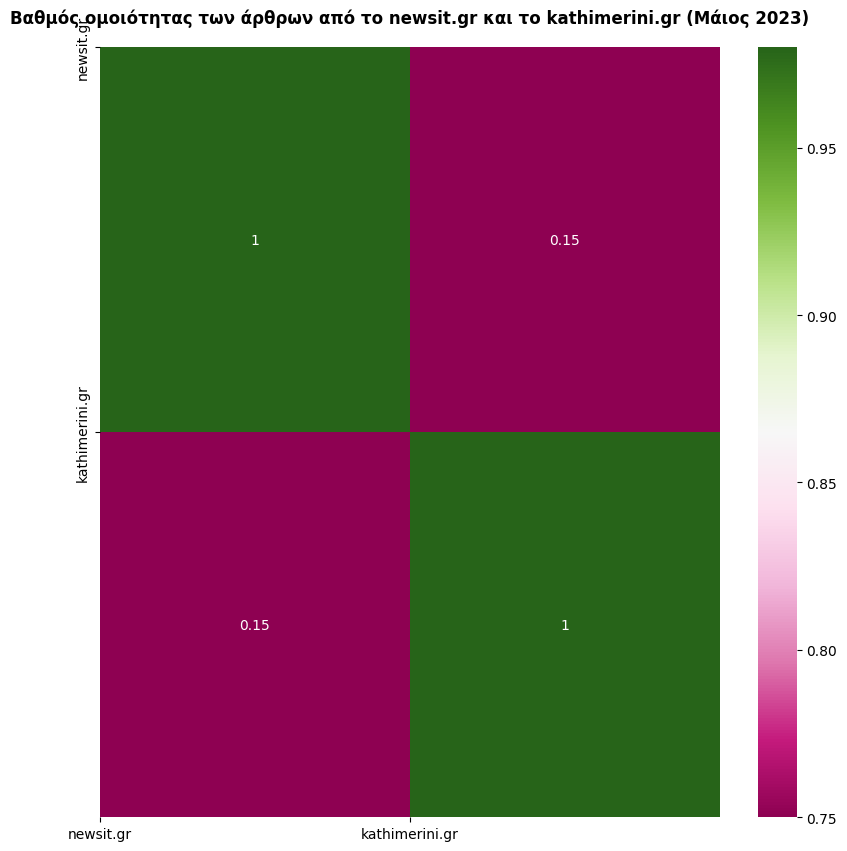

In [70]:
# φτιάχνω ένα text για κάθε site με συνένωση των κειμένων ολων των άρθρων του (full_text είναι το όνομα της στήλης με το πλήρες κείμενο - σε εσάς μπορεί να έχει άλλο όνομα)
newsit_text = newsit_full_articles_df['full_text'].str.cat(sep = ' ')
kathimerini_text = kathimerini_full_articles_df['full_text'].str.cat(sep = ' ')

# φτιάχνω ένα df με τα δύο texts
two_sites_list = [] # φτιάχνω μια λίστα για να βάλω μέσα τα dictionaries που φτιάχνω παρακάτω
newsitD = {'site' : 'newsit.gr', 'text' : newsit_text} # φτιάχνω dictionary για την newsit
two_sites_list.append(newsitD) # βάζω το dictionary στη λίστα
kathimeriniD = {'site' : 'kathimerini.gr', 'text' : kathimerini_text} # φτιάχνω dictionary για το kathimerini
two_sites_list.append(kathimeriniD) # βάζω το dictionary στη λίστα
two_sites_df = pd.DataFrame(two_sites_list) # φτιάχνω dataframe από τη λίστα με τα δύο dictionaries

# στον tfidf_vectorizer, βάζω να συγκρίνει τα rows της στήλης 'text' από το df των 2 sites που έφτιαξα
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(two_sites_df['text'])

# φτιάχνω το array της ομοιότητας
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

# φτιάχνω το heatmap
plt.figure(figsize=(10, 10))
plt.title('Βαθμός ομοιότητας των άρθρων από το newsit.gr και το kathimerini.gr (Μάιος 2023)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα
sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")
plt.xticks([0, 1], ['newsit.gr', 'kathimerini.gr']); # ορίζω να εμφανίζονται τα ονόματα των sites αντί για το 0 και 1 του index, στον άξονα x
plt.yticks([0, 1], ['newsit.gr', 'kathimerini.gr']); # ορίζω να εμφανίζονται τα ονόματα των sites αντί για το 0 και 1 του index, στον άξονα y

**Σχόλια/Συμπεράσματα**

Το παραπάνω heatmap δείχνει την ομοιότητα μεταξύ των δύο κειμένων σε μορφή πίνακα. Αφού τα κείμενα είναι δύο, ο πίνακας έχει μέγεθος  2x2.

* Το ετράγωνο πάνω-αριστερά συγκρίνει την ομοιότητα του κειμένου newsit.gr με τον εαυτό του.

* Το τετράγωνο πάνω-δεξιά συγκρίνει την ομοιότητα του κειμένου newsit.gr με το κείμενο kathimerini.gr.

* Το τετράγωνο κάτω-αριστερά συγκρίνει την ομοιότητα του κειμένου kathimerini.gr με το κείμενο newsit.gr.

* Το τετράγωνο κάτω-δεξιά συγκρίνει την ομοιότητα του κειμένου kathimerini.gr με τον εαυτό του.

Τα διαγώνια τετράγωνα (πάνω-αριστερά και κάτω-δεξιά) έχουν ομοιότητα 1, αφού το εκάστοτε κείμενο είναι τέλεια όμοιο με τον εαυτό του. Τα τετράγωνα εκτός της διαγωνίου (πάνω-δεξιά και κάτω-αριστερά) πρέπει έχουν τις ίδιες τιμές, αφού αντιπροσωπεύουν την ομοιότητα μεταξύ των δύο ίδιων κειμένων.